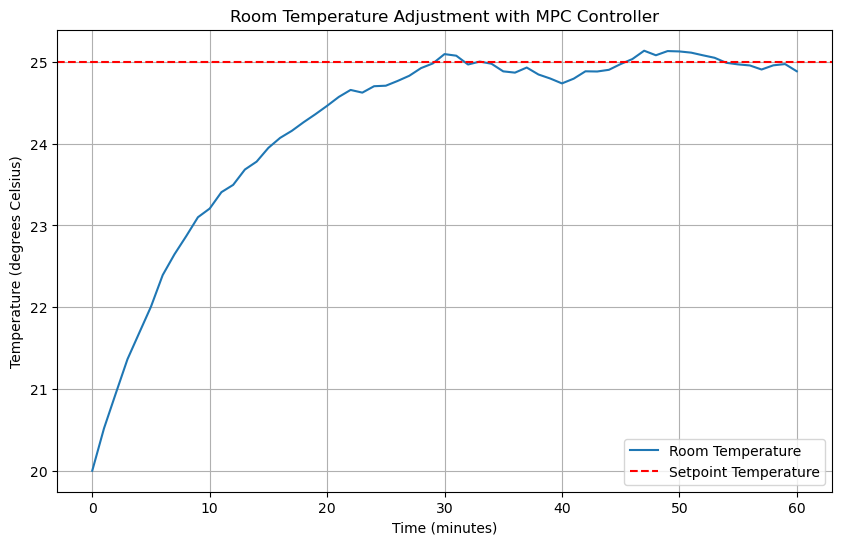

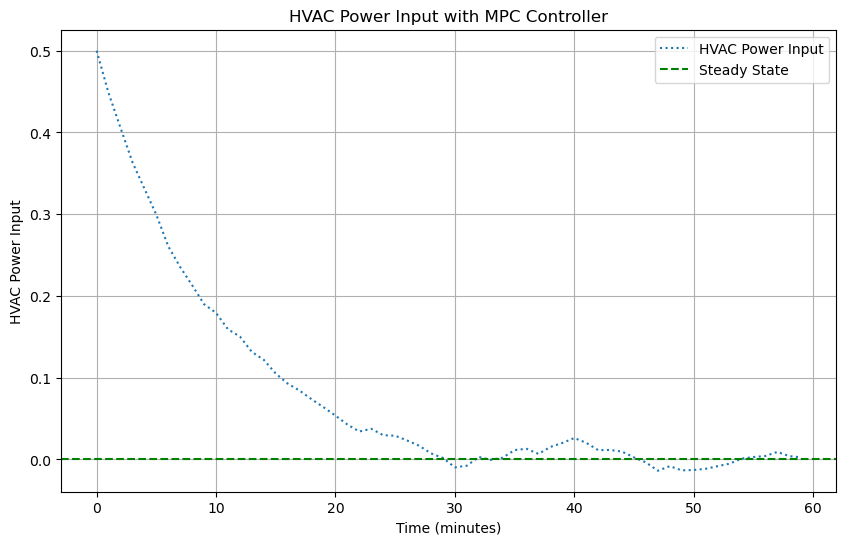

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Define simulation parameters
dt = 1  # Time step (minutes)
simulation_time = 60  # Simulation time (minutes)

# Initialize variables
T_room = 20  # Initial room temperature (degrees Celsius)
T_setpoint = 25  # Setpoint temperature (degrees Celsius)
noise_std = 0.5  # Standard deviation of noise

# Simulate the temperature adjustment process with perturbations
time_values = np.arange(0, simulation_time + dt, dt)
T_values = [T_room]  # List to store room temperature values

for t in time_values[1:]:
    # Add noise
    noise = np.random.normal(0, noise_std)
    # Update room temperature using simple proportional control
    error = T_setpoint - T_values[-1] + noise
    T_room += 0.1 * error * dt  # Proportional control law
    T_values.append(T_room)

# Plot the room temperature adjustment
plt.figure(figsize=(10, 6))
plt.plot(time_values, T_values, label='Room Temperature')
plt.axhline(y=T_setpoint, color='r', linestyle='--', label='Setpoint Temperature')
plt.xlabel('Time (minutes)')
plt.ylabel('Temperature (degrees Celsius)')
plt.title('Room Temperature Adjustment with MPC Controller')
plt.legend()
plt.grid(True)
plt.show()

# Simulate and plot the HVAC power input
P_HVAC_values = [0.1 * (T_setpoint - T) for T in T_values[:-1]]  # Simple proportional control for HVAC input (for visualization)

plt.figure(figsize=(10, 6))
plt.plot(time_values[:-1], P_HVAC_values, label='HVAC Power Input', linestyle=':')
plt.axhline(y=0, color='g', linestyle='--', label='Steady State')
plt.xlabel('Time (minutes)')
plt.ylabel('HVAC Power Input')
plt.title('HVAC Power Input with MPC Controller')
plt.legend()
plt.grid(True)
plt.show()
